# 1. Create a CNN model for binary class problems.

# Import required libraries

In [1]:
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

# Image Augmentation

In [2]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#create an image instance of the ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.2,
    zoom_range=0.2,
    rescale=1./255,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Train data fetching from the directory of images
batch_size = 16
train_data = train_datagen.flow_from_directory(
    'C:/Users/Ramesh/Downloads/training_set/training_set',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

# Test data fetching from the directory of images
test_data = test_datagen.flow_from_directory(
    'C:/Users/Ramesh/Downloads/test_set/test_set',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


# Build a CNN model

In [3]:
model=Sequential()
#1st convolution layer
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#2nd convolution layer
model.add(Conv2D(64,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#3rd convolution layer
model.add(Conv2D(32,(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))
#converting multi dimension to 1 d array
model.add(Flatten())
model.add(Dense(units=150,activation='relu'))
model.add(Dropout(0.2))
#output layer
model.add(Dense(units=1,activation='sigmoid'))
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 32)       

# Compile the cnn model

In [4]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Run the CNN Model

In [5]:
result=model.fit(train_data,
 steps_per_epoch=48//batch_size,epochs=30,
 validation_data=test_data,
 validation_steps=48//batch_size

 )

Epoch 1/30


3/3 [==============================] - 4s 728ms/step - loss: 1.2415 - accuracy: 0.3750 - val_loss: 0.6570 - val_accuracy: 0.6250
Epoch 2/30
3/3 [==============================] - 1s 487ms/step - loss: 0.7636 - accuracy: 0.4583 - val_loss: 0.6866 - val_accuracy: 0.5208
Epoch 3/30
3/3 [==============================] - 1s 508ms/step - loss: 0.7063 - accuracy: 0.4375 - val_loss: 0.6856 - val_accuracy: 0.6250
Epoch 4/30
3/3 [==============================] - 1s 485ms/step - loss: 0.6980 - accuracy: 0.4792 - val_loss: 0.6996 - val_accuracy: 0.4792
Epoch 5/30
3/3 [==============================] - 1s 468ms/step - loss: 0.6891 - accuracy: 0.5417 - val_loss: 0.7152 - val_accuracy: 0.4583
Epoch 6/30
3/3 [==============================] - 1s 489ms/step - loss: 0.7188 - accuracy: 0.4583 - val_loss: 0.6949 - val_accuracy: 0.4792
Epoch 7/30
3/3 [==============================] - 1s 485ms/step - loss: 0.7398 - accuracy: 0.5000 - val_loss: 0.6962 - val_accuracy: 0.4167
Epoch 8/30
3/3 [==

# Evaluate the model

In [6]:
score = model.evaluate(test_data, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6937662363052368
Test accuracy: 0.4967869520187378


# Plot for Train & Test Accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


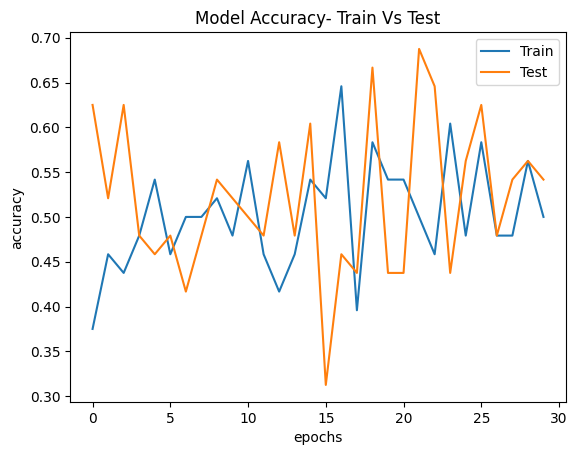

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
print(result.history.keys())
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()

# Plot for Train & Test Loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


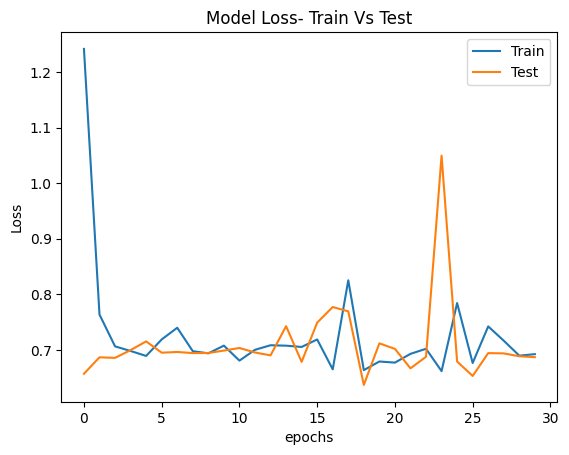

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
print(result.history.keys())
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()

# Run Inference on new image

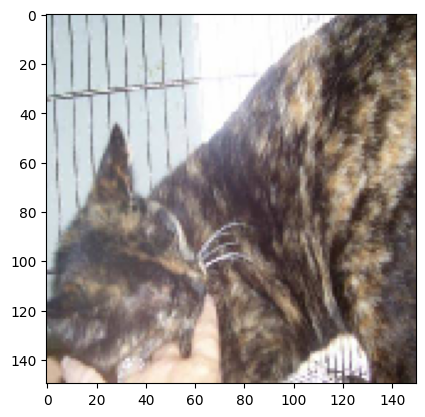

In [9]:
img=load_img('C:/Users/Ramesh/Downloads/test_set/test_set/cats/cat.4006.jpg',
 target_size=(150,150))
plt.imshow(img)

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = float(predictions[0])
print(f"This image is {100*(1-score):.2f}% cat and {100 * score:.2f}% dog")

1/1 [==============================] - 0s 202ms/step
This image is 100.00% cat and 0.00% dog


C:\Users\Ramesh\AppData\Local\Temp\ipykernel_21424\3406634491.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(predictions[0])


In [11]:
from keras.preprocessing import image
import numpy as np
unseen=image.img_to_array(img)
unseen=np.expand_dims(unseen,axis=0)
result=model.predict(unseen)

1/1 [==============================] - 0s 44ms/step


# Confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix

# Evaluate the model on the test set
y_pred = model.predict_generator(test_data)
y_pred = np.argmax(y_pred, axis=1)
print("Confusion Matrix:\n",confusion_matrix(test_data.classes,y_pred))

C:\Users\Ramesh\AppData\Local\Temp\ipykernel_21424\1658647262.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_data)


Confusion Matrix:
 [[1011    0]
 [1012    0]]


# Classification report

In [13]:
from sklearn.metrics import classification_report
target_names = ['cat', 'dog']
print("Classification Report:\n", classification_report(test_data.classes,y_pred, target_names=target_names))

Classification Report:
               precision    recall  f1-score   support

         cat       0.50      1.00      0.67      1011
         dog       0.00      0.00      0.00      1012

    accuracy                           0.50      2023
   macro avg       0.25      0.50      0.33      2023
weighted avg       0.25      0.50      0.33      2023



C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

# Heatmap for confusion matrix

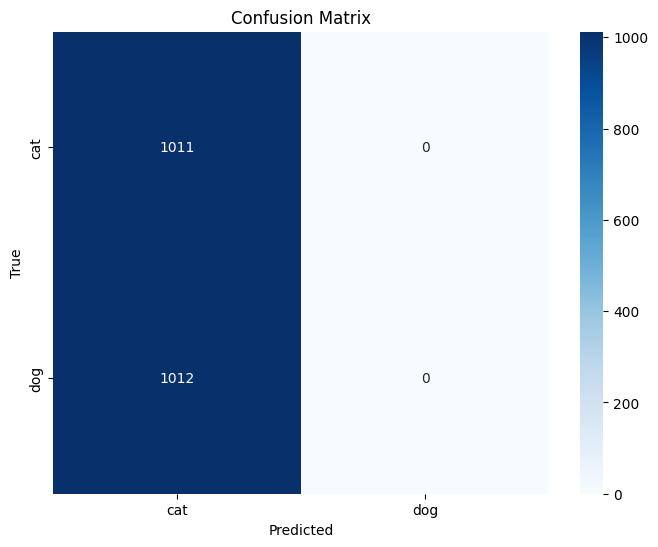

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_data.classes,y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['cat', 'dog'], 
            yticklabels=['cat', 'dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 2. Build a multiclass classification model using CNN.

# Import required libraries

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# Image Augmentation

In [16]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.2,
    zoom_range=0.2,
    rescale=1./255,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Train data fetching from the directory of images

In [20]:
batch_size = 16
train_data = train_datagen.flow_from_directory(
    'C:/Users/Ramesh/Downloads/archive (1)/Butterfly Identification/training',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'  # 'categorical' for multiclass classification
)
num_classes = len(train_data.class_indices)

Found 6499 images belonging to 1 classes.


# Test data fetching from the directory of images

In [21]:
test_data = test_datagen.flow_from_directory(
    'C:/Users/Ramesh/Downloads/archive (1)/Butterfly Identification/testing',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'  # 'categorical' for multiclass classification
)

Found 2786 images belonging to 1 classes.


# Build a CNN model

In [22]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=150, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=num_classes, activation='softmax'))  # Change num_classes to your actual number of classes
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 32)       

# Compile the CNN model

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Run the CNN Model

In [24]:
result = model.fit(
    train_data,
    steps_per_epoch=48 // batch_size,
    epochs=30,
    validation_data=test_data,
    validation_steps=48 // batch_size
)

Epoch 1/30


C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 4s 655ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/30
3/3 [==============================] - 1s 422ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
3/3 [==============================] - 1s 403ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/30
3/3 [==============================] - 1s 384ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/30
3/3 [==============================] - 1s 409ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/30
3/3 [==============================] - 1s 438ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/30
3/3 [==============================] - 1s 431ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+0

# Evaluate the model

In [25]:
score = model.evaluate(test_data, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0
Test accuracy: 1.0


# Plot for Train & Test Accuracy

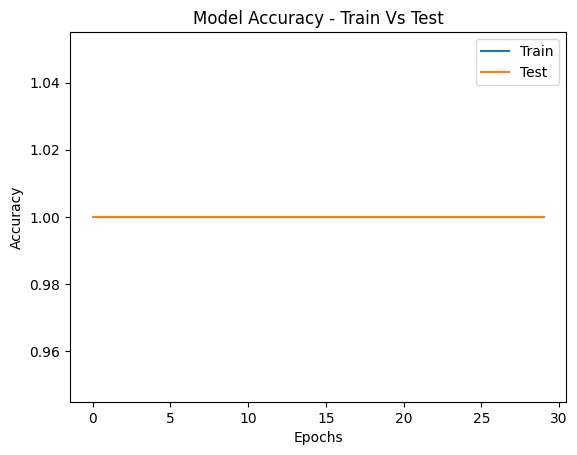

In [26]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy - Train Vs Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

# Plot for Train & Test Loss

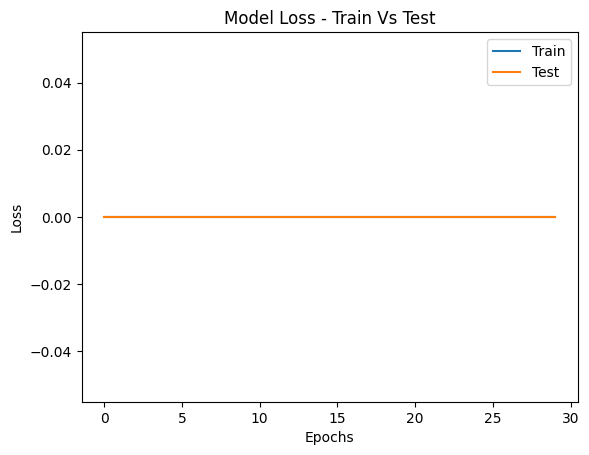

In [27]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss - Train Vs Test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

# Run Inference on new image

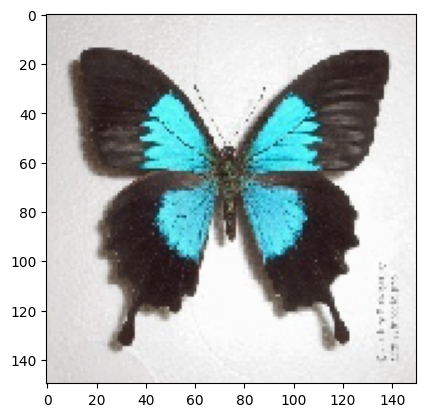

In [28]:
img = load_img('C:/Users/Ramesh/Downloads/archive (1)/Butterfly Identification/testing/test/Image_97.jpg', target_size=(150, 150))
plt.imshow(img)
plt.show()

In [29]:
img_array = tf.expand_dims(image.img_to_array(img), 0)
predictions = model.predict(img_array)
predicted_class = tf.argmax(predictions[0]).numpy()

print(f"The predicted class is: {predicted_class}")

1/1 [==============================] - 0s 170ms/step
The predicted class is: 0


# Confusion matrix

In [30]:
y_pred = model.predict_generator(test_data)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

conf_matrix = confusion_matrix(test_data.classes, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

C:\Users\Ramesh\AppData\Local\Temp\ipykernel_21424\3660103792.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_data)


Confusion Matrix:
 [[2786]]


# Classification report

In [31]:
target_names = [f"Class {i}" for i in range(num_classes)]  # Adjust class names accordingly
class_report = classification_report(test_data.classes, y_pred_classes, target_names=target_names)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      2786

    accuracy                           1.00      2786
   macro avg       1.00      1.00      1.00      2786
weighted avg       1.00      1.00      1.00      2786



# Heatmap for confusion matrix

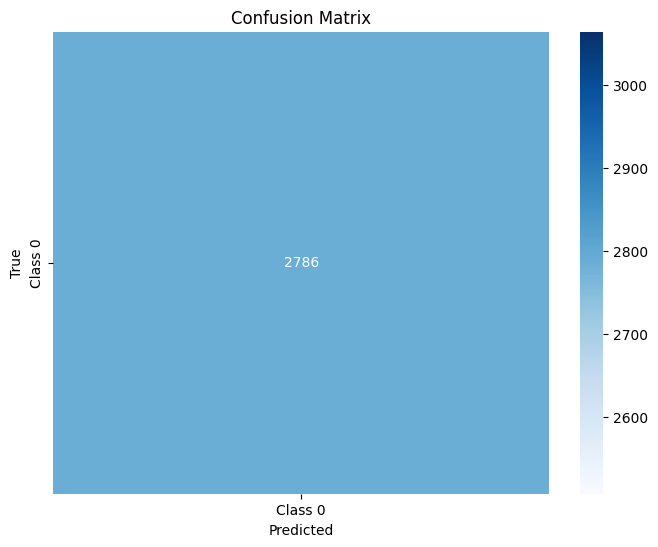

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()